<a href="https://colab.research.google.com/github/pbetschart/portfoliopbetschart/blob/master/Dados%20Clim%C3%A1ticos%20Marte_R01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/pbetschart/portfoliopbetschart/master/Helvetia-Go.png" height="150px"></p>

<p align="center"> by Eng. Paulo Fernando Betschart 

# Introdução

## Alô alô, marciano! - Uma Análise Exploratória do Planeta Vermelho

> _"Alô, alô, marciano,
aqui quem fala é da Terra /
Pra variar estamos em guerra"_

Os versos eternizados na voz de Elis Regina podem cair de novo na boca dos nossos netos, segundo a Nasa.

Brincadeiras a parte, Marte está no alvo da agência para missões tripuladas. Ainda que agora pareça filme de ficção científica, os passos estão sendo dados.
E, no setor aeroespacial, passos costumam ser sinônimo de altos investimentos (de $$ e de tempo).
Portanto, vale a pena acompanhar o que nossa geração está descobrindo - sim, já somos privilegiados por presenciarmos diversas inovações neste tema.

Marte é interessante sob diversos pontos de vista para nós aqui da Terra. 
A primeira é pelas possíveis semelhanças entre o nosso planeta azul e o planeta vermelho.
As investigações atuais vão na linha da existência de vida microbiana em Marte (semelhante a Terra).
O que levanta a pergunta: por que a vida - como a entendemos por aqui - na Terra se desenvolveu e em Marte não prosperou da mesma forma?
Quais as condições em que isso se deu ao longo do tempo e se desenrola hoje?

O *rover Perseverance* foi atrás de provas de que há vida microbiana em Marte. Ele se junta (apesar de não se encontrarem) ao *Curiosity*, em operação desde 2012.

Naturalmente o tema do envio de humanos para Marte está sempre em alta. Para entendermos o contexto, vale citar que a Lua seria um ponto de parada (o que está sendo investigado na *Missão Artemis*) para que decolagens pudessem ser feitas de lá até Marte (devido ao tempo da viagem entre os dois planetas).

Exercícios de futurologia a postos, vale a pena explorarmos os primeiros dados coletados diretamente de Marte pelo *rover Curiosity*.
Esta primeira análise nos sensibilizará para acompanharmos as próximas descobertas com a chegada do *Perseverance*.




## Obtenção dos Dados

O robô _Curiosity_ é fruto da parceria de diversos institutos e países.
O instrumento REMS (*Rover Environmental Monitoring Station*), que coleta dos dados climáticos em torno do *rover*, é de desenvolvimento do Centro de Astrobiologia (CSIC-INTA), na Espanha, tendo Javier Gómez-Elvira como seu principal pesquisador.

Esta estação embarcada no *rover* captura os dados de:
1. velocidade do vento;
2. temperatura;
3. umidade relativa do ar;
4. pressão atmosférica;
5. nível de radiação ultravioleta que penetra a atmofera marciana.

Para conhecer um pouco da tecnologia empregada no _REMS_, expliquei [neste link](https://helvet.io/portfolio/marsclimate/).

O _dataset_ utilizado neste projeto se encontra [neste link](https://query.data.world/s/dexzg5hk3y2rykhhfar6raoqgybzyi).



## Legenda para as Variáveis do _Dataset_

A partir do _dataset_ que será trabalhado a seguir, vamos legendar as colunas para facilitar o entendimento:

* `id`: código da transmissão do dado;
* `terrestrial_date`: dia, mês e ano correspondente a Terra;
* `sol`: contagem dos dias em Marte;
* `ls`: longitude solar
* `month`: mês em Marte. Semelhante a Terra, em Marte pode ser organizado em 12 meses;
* `min_temp`: temperatura mínima medida pelo Curiosity em um dia (em ºC);
* `max_temp`: temperatura máxima medida pelo Curiosity em um dia (em ºC);
* `pressure`: pressão atmosférica medida pelo Curiosity em um dia (em Pa);
* `wind_speed`: velocidade do vento medida pelo Curiosity (em m/s);
* `atmo_opacity`: breve descrição das condições metereológicas em um dia em Marte.

Observe que este _dataset_ não disponibiliza **todas** as variáveis mensuradas pelo _REMS_.

# Objetivo:

Neste _notebook_ o objetivo é:

1. A partir do _dataset_ disponibilizado pela NASA, realizar a limpeza dos dados;
2. Executar uma análise exploratória dos dados coletados pelo *rover Curiosity*;
3. Visualizar os dados das temperaturas medidas, velocidade do vento e da pressão atmosférica.




# Análise Inicial

In [ ]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configurando o notebook:
sns.set_style()

# Importando os dados:
df_orig = pd.read_csv('https://query.data.world/s/dexzg5hk3y2rykhhfar6raoqgybzyi')

# Verificando as 5 primeiras linhas:
df_orig.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


Após uma primeira observação do _dataset_, pretendemos de início tornar a data (`terrestrial_date`) como index do _DataFrame_.
Assim vamos gerar, a partir do mesmo arquivo `.csv`, o `df_data`.

In [ ]:
# tornando a coluna "terrestrial_date" em index

df_data = pd.read_csv("https://query.data.world/s/dexzg5hk3y2rykhhfar6raoqgybzyi", index_col="terrestrial_date", parse_dates=True)
df_data.head()

,id,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
terrestrial_date,,,,,,,,,
2018-02-27,1895,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
2018-02-26,1893,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2018-02-25,1894,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
2018-02-24,1892,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
2018-02-23,1889,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [ ]:
# conferindo o formato do Index do DateFrame
df_data.index

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-25', '2018-02-24',
               '2018-02-23', '2018-02-22', '2018-02-21', '2018-02-20',
               '2018-02-19', '2018-02-18',
               ...
               '2012-08-23', '2012-08-22', '2012-08-21', '2012-08-20',
               '2012-08-19', '2012-08-18', '2012-08-17', '2012-08-16',
               '2012-08-15', '2012-08-07'],
              dtype='datetime64[ns]', name='terrestrial_date', length=1894, freq=None)

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df_data.shape[1], "\n"
      'Entradas: ', df_data.shape[0])

# verificando as primeiras entradas
df_data.head()

Dimensões do Dataset 
Variáveis:  9 
Entradas:  1894


,id,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
terrestrial_date,,,,,,,,,
2018-02-27,1895,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
2018-02-26,1893,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2018-02-25,1894,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
2018-02-24,1892,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
2018-02-23,1889,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [ ]:
# verificando as 5 últimas linhas:
df_data.tail()

,id,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
terrestrial_date,,,,,,,,,
2012-08-18,24,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
2012-08-17,13,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
2012-08-16,2,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
2012-08-15,232,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny
2012-08-07,1,1,150,Month 6,NaN,NaN,NaN,NaN,Sunny


Aqui, ao acessar as 5 primeiras linhas e as 5 últimas linhas e o formato, já observamos que os registros estão em ordem cronológica, sendo o dado mais antigo obtido em 7 de agosto de 2012 e o mais recente a compor este _dataset_ é de 27 de fevereiro de 2018.

In [ ]:
# verificando o nome das colunas:
print ("As colunas contidas neste dataset são:", df_data.columns)

As colunas contidas neste dataset são: Index(['id', 'sol', 'ls', 'month', 'min_temp', 'max_temp', 'pressure',
       'wind_speed', 'atmo_opacity'],
      dtype='object')


In [ ]:
# verificando o tipo de cada coluna (obs.: o Pandas aplica o formato "floats" quando há dados ausentes)
df_data.dtypes

id                int64
sol               int64
ls                int64
month            object
min_temp        float64
max_temp        float64
pressure        float64
wind_speed      float64
atmo_opacity     object
dtype: object

### Valores Ausentes

Além de identificar e quantificar os valores ausentes, aqui se dará o tratamento a estes dados.

In [ ]:
# verificando a quantidade de valores ausentes de cada coluna, ordenando primeiro quem apresenta maior quantidade de valores ausentes:

df_data.isnull().sum().sort_values(ascending=False)

wind_speed      1894
pressure          27
max_temp          27
min_temp          27
atmo_opacity       0
month              0
ls                 0
sol                0
id                 0
dtype: int64

Acima pudemos verificar que:

* a coluna `wind_speed` é a que apresenta a maior quantidade de valores ausentes (1894);
* as colunas `min_temp`, `max_temp` e `pressure` possuem 27 valores ausentes;
* as demais colunas não possuem valores ausentes.

Agora verificaremos o quanto percentualmente os valores ausentes representam nas colunas `min_temp`, `max_temp` e `pressure`:



In [ ]:
# verificando a porcentagem de valores ausentes nas colunas min_temp, max_temp e pressure:

print ("A porcentagem de valores ausentes da coluna wind_speed é:", (df_data.wind_speed.isnull().sum() / df_data.shape[0]) * 100)
print ("A porcentagem de valores ausentes da coluna min_tem é:", (df_data.min_temp.isnull().sum() / df_data.shape[0]) * 100)
print ("A porcentagem de valores ausentes da coluna max_temp é:", (df_data.max_temp.isnull().sum() / df_data.shape[0]) * 100)
print ("A porcentagem de valores ausentes da coluna pressure é:", (df_data.pressure.isnull().sum() / df_data.shape[0]) * 100)

A porcentagem de valores ausentes da coluna wind_speed é: 100.0
A porcentagem de valores ausentes da coluna min_tem é: 1.4255543822597676
A porcentagem de valores ausentes da coluna max_temp é: 1.4255543822597676
A porcentagem de valores ausentes da coluna pressure é: 1.4255543822597676


**O que fazer com os valores ausentes?**

Quanto a coluna `wind_speed`, por ela ser composta 100% de valores ausentes, ela será excluída.

Observamos acima que valores ausentes para as três colunas restantes, correspondem somente a 1,43% do total de dados de cada coluna.

Por zelo e a fim de explorar os recursos em _Python_, não vamos simplesmente descartar essas linhas e sim preencher com a mediana encontrada de cada coluna.

In [ ]:
# excluindo a coluna "wind_speed"
mars = df_data.drop(axis=1, columns="wind_speed")
mars.tail()

,id,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
terrestrial_date,,,,,,,,
2012-08-18,24,12,156,Month 6,-76.0,-18.0,741.0,Sunny
2012-08-17,13,11,156,Month 6,-76.0,-11.0,740.0,Sunny
2012-08-16,2,10,155,Month 6,-75.0,-16.0,739.0,Sunny
2012-08-15,232,9,155,Month 6,NaN,NaN,NaN,Sunny
2012-08-07,1,1,150,Month 6,NaN,NaN,NaN,Sunny


In [ ]:
# criando a variável que calcula a mediana da coluna min_temp
min_temp_mediana = mars.min_temp.median()

# atribuindo a mediana aos valores ausentes da coluna min_temp
mars.min_temp.fillna(min_temp_mediana, inplace=True)

# conferindo se na coluna min_temp ainda há valores ausentes
mars.min_temp.isnull().sum()

0

In [ ]:
# criando a variável que calcula a mediana da coluna max_temp:
max_temp_mediana = mars.max_temp.median()

# atribuindo a mediana aos valores ausentes da coluna max_temp:
mars.max_temp.fillna(max_temp_mediana, inplace=True)

# conferindo se na coluna max_temp ainda há valores ausentes:
mars.max_temp.isnull().sum()

0

In [ ]:
# criando a variável que calcula a mediana da coluna pressure:
pressure_mediana = mars.pressure.median()

# atribuindo a mediana aos valores ausentes da coluna pressure:
mars.pressure.fillna(pressure_mediana, inplace=True)

# conferindo se na coluna pressure ainda há valores ausentes:
mars.pressure.isnull().sum()

0

Dessa forma, identificadas as colunas contendo valores ausentes:

1. A coluna `wind_speed` está excluída;
2. As colunas `min_temp`, `max_temp` e `pressure` tiveram suas linhas com valores ausentes substituídas pela mediana de cada coluna.

In [ ]:
# conferindo as últimas 5 linhas do novo dataframe
mars.tail()

,id,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
terrestrial_date,,,,,,,,
2012-08-18,24,12,156,Month 6,-76.0,-18.0,741.0,Sunny
2012-08-17,13,11,156,Month 6,-76.0,-11.0,740.0,Sunny
2012-08-16,2,10,155,Month 6,-75.0,-16.0,739.0,Sunny
2012-08-15,232,9,155,Month 6,-76.0,-11.0,853.0,Sunny
2012-08-07,1,1,150,Month 6,-76.0,-11.0,853.0,Sunny


# Análise Exploratória

Nesta análise queremos acessar e visualizar os dados das colunas a respeito das temperaturas e da pressão atmosférica.

Vamos observar as variáveis a partir de critérios estatísticos.

Uma das maneiras mais simples de se iniciar uma análise exploratória das variáveis numéricas é utilizando o método `describe()`.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - percentil 25
* **50%** - percentil 50 (e mediana)
* **75%** - percentil 75
* **max** - maior valor da coluna

Nota de estudo: através deste comando, também é possível identificar colunas com valores ausentes e possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [ ]:
mars.describe()

,id,sol,ls,min_temp,max_temp,pressure
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,948.372228,1007.930306,169.180570,-76.119324,-12.488912,841.236536
std,547.088173,567.879561,105.738532,5.464723,10.624386,53.883510
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,802.000000
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000


Aqui quero chamar atenção para alguns dados que já "nos saltam aos olhos" (principalmente se comparamos com as condições na Terra):

1. a variável `max_temp` possui 75% dos seus valores abaixo de -3ºC.
2. a menor temperatura registrada (variável `min_temp`) foi de -90ºC;
3. a pressão média registrada (variável `pressure`) é de cerca de 841 Pa (para termos mais proporção deste dado, na Terra ao nível do mar a pressão média é de 101,325 KPa).



Observação: para as colunas `id`, `sol`e `ls` não faz sentido a análise estatística. E sim para as colunas referentes a temperatura e pressão.

Histogramas são poderosas ferramentas para visualização dos dados, nos mostrando a distribuição dos valores em uma variável.


In [ ]:
# Analisando o histograma da temperatura mínima:

#fig, ax = plt.subplots()

#mars.min_temp.hist();

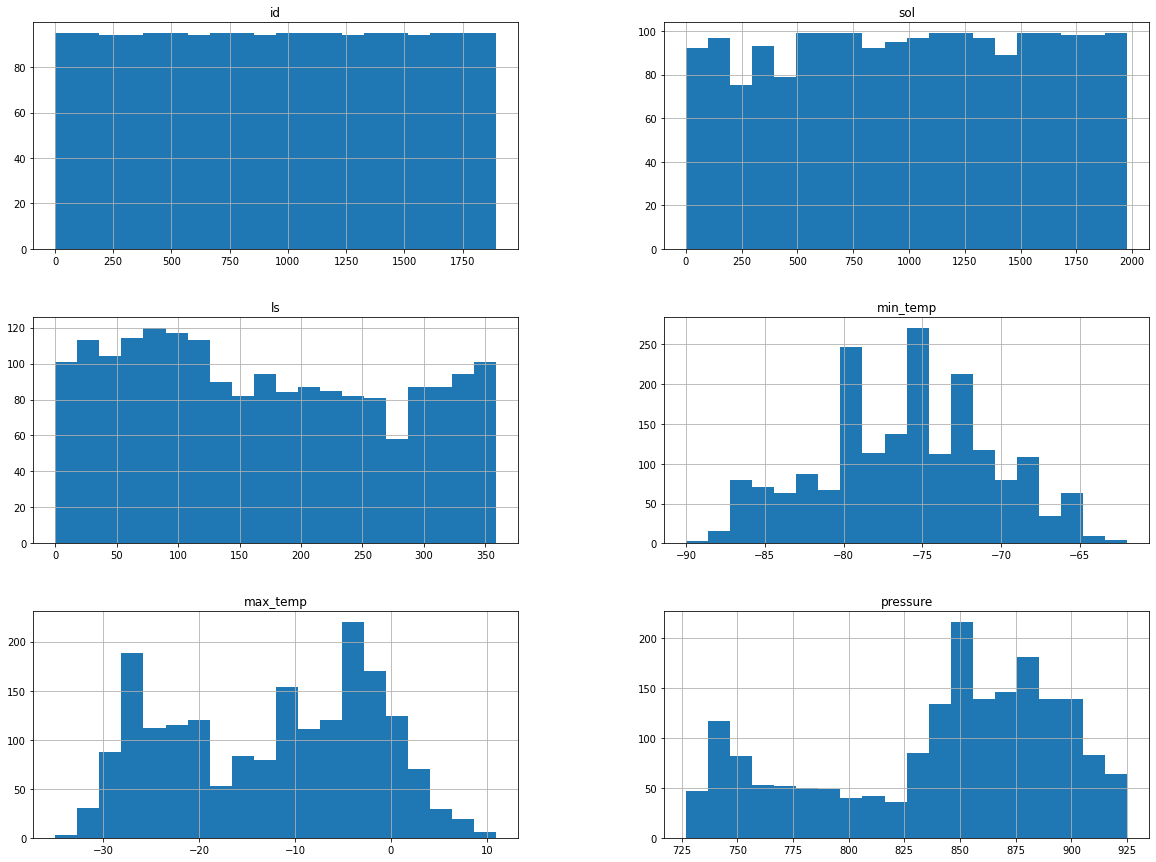

In [ ]:
# Histogramas de todas as variáveis:

mars.hist(bins=20, figsize=(20,15));

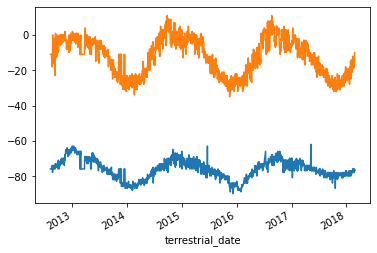

In [ ]:
# plotar gráfico de linhas para min_temp e max_temp:
mars.min_temp.plot();
mars.max_temp.plot();

In [ ]:
# Temperatura média ao dia (calculada entre as temperaturas mínimas e máximas):

mars['average_temp'] = mars[['min_temp', 'max_temp']].mean(axis=1)

print (mars.average_temp)

terrestrial_date
2018-02-27   -43.5
2018-02-26   -43.5
2018-02-25   -46.0
2018-02-24   -45.0
2018-02-23   -48.0
              ... 
2012-08-18   -47.0
2012-08-17   -43.5
2012-08-16   -45.5
2012-08-15   -43.5
2012-08-07   -43.5
Name: average_temp, Length: 1894, dtype: float64


In [ ]:
# Calculando a média (de todo período)

print ("A média de temperatura é:", mars.average_temp.mean())

# Mediana (de todo período)

print ("A mediana das temperaturas é:", mars.average_temp.median())

# Desvio Padrão (de todo período)

print ("O desvio padrão é de:", mars.average_temp.std())

A média de temperatura é: -44.30411826821542
A mediana das temperaturas é: -43.5
O desvio padrão é de: 7.7180686143982875


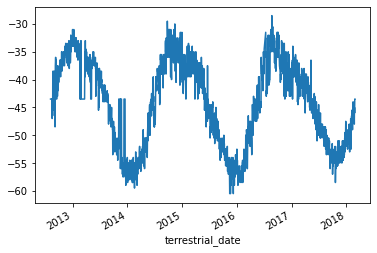

In [ ]:
# Plotando a média das temperaturas:

mars.average_temp.plot()

In [ ]:
# Calculando a média da pressão:

print ("A média da pressão atmosférica é:", mars.pressure.mean())

# Mediana:

print ("A mediana da pressão atmosférica é:", mars.pressure.median())

# Desvio Padrão

print ("O desvio padrão é de:", mars.pressure.std())

A média da pressão atmosférica é: 841.2365364308342
A mediana da pressão atmosférica é: 853.0
O desvio padrão é de: 53.88351012441117


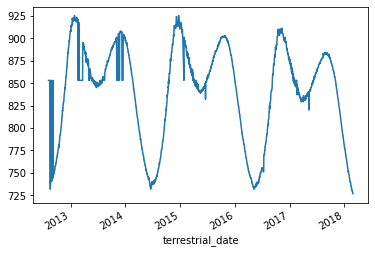

In [ ]:
# plotar gráfico de linhas para pressão atmosférica:

mars.pressure.plot();

Agora vamos nos deter na coluna `atmo_opacity`. Nela é indicada a condição metereológica observada pelo _Rover Curiosity_ na região onde ele se encontra.
Aqui cabe destacar que ainda pesquiso o método de definição que os cientistas do projeto adotam para a classificação.

Observando as primeiras e as últimas linhas, vimos que neste campo pode estar indicada, por exemplo, a descrição _Sunny_ (ensolarado). Porém queremos agora conferir as informações de todas as linhas desta coluna.

In [ ]:
# conferindo as informações únicas existentes na coluna "atmo_opacity"
mars.atmo_opacity.unique()

array(['Sunny', '--'], dtype=object)

Verificamos então que, nesta coluna deste _dataset_, aparecem duas possibilidades de descrição: `sunny` e `--`.
Na fonte deste _dataset_ não foi especificado o significado de `--`. Portanto, interpretamos que são dados que, por algum motivo, não foram capturados/transmitidos/registrados e não receberam a mesma indicação dos valores ausentes (como nas outras colunas, com `NaN`).

De qualquer forma, este fato - que na análise dos valores ausentes não foi identificado - agora deve ser observado para saber se compromete ou não o nosso conhecimento dos dados metereológicos na região em que o _Rover Curiosity_ está (cratera Gale).

In [ ]:
# quantificando os dados na coluna atmo.opacity
mars.atmo_opacity.value_counts()

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64

In [ ]:
# percentual dos dados coletados na coluna atmo_opacity
mars.atmo_opacity.value_counts() / mars.shape[0]

Sunny    0.998416
--       0.001584
Name: atmo_opacity, dtype: float64

Assim, sabe-se que a ausência deste dado na coluna `atmo_opacity` não chega a 1%.
E a ocorrência da condição metereológica `Sunny` é de 99,84% (especificamente neste banco de dados).

Por curiosidade (sem trocadilho com o nome do _rover_), vamos verificar quais linhas aparecem sem preenchimento na coluna `atmo_opacity`.

In [ ]:
mars.loc[mars.atmo_opacity == '--'].index

DatetimeIndex(['2015-04-16', '2015-03-28', '2015-01-27'], dtype='datetime64[ns]', name='terrestrial_date', freq=None)

Assim, rastreamos dentro do _dataset_ em quais datas não há registro de `atmo_opacity` para ver se encontramos alguma especificidade.

In [ ]:
mars['2015-04-16']

,id,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity,average_temp
terrestrial_date,,,,,,,,,
2015-04-16,890,957,326,Month 11,-76.0,-11.0,853.0,--,-43.5


In [ ]:
mars['2015-03-28']

,id,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity,average_temp
terrestrial_date,,,,,,,,,
2015-03-28,873,939,316,Month 11,-76.0,-11.0,853.0,--,-43.5


In [ ]:
mars['2015-01-27']

,id,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity,average_temp
terrestrial_date,,,,,,,,,
2015-01-27,816,880,279,Month 10,-76.0,-11.0,853.0,--,-43.5


Em uma primeira análise, não identifico algo específico que possa ser relacionado a ausência da descrição das condições metereológicas em Marte nestas datas.

# Conclusão

A partir do _dataset_ disponível, pudemos:

1. conhecer as variáveis que o instrumento _REMS_ do _rover Curiosity_ mede;
2. realizar a limpeza de dados para em seguida realizar uma análise exploratória dos dados;
3. Visualizamos os dados no formato histograma e como gráfico de linhas;
4. Extraímos e calculamos:

* a menor temperatura encontrada pelo _rover Curiosity_ foi de -90ºC;
* a maior temperatura registrada foi de 11ºC;
* a temperatura média do período foi de -44,3ºC com mediana de -43,5ºC e desvio padrão de +/- 7,72;
* a pressão média registrada na cratera Jezero foi de aproximadamente 841 Pa, mediana de 853 Pa e desvio padrão de +/- 53,88.






Plotando o gráfico de linhas das temperaturas (mínima e máxima), também é possível verificar um ciclo (padrão) no comportamento das altas e baixas ao longo do tempo (conforme abaixo), quando o pico se dá no intervalo aproximado de 2 anos.

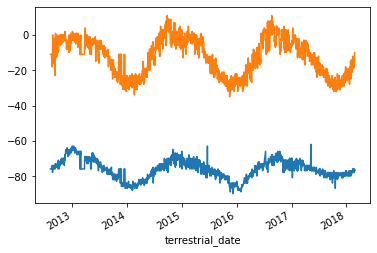

In [ ]:
mars.min_temp.plot();
mars.max_temp.plot();

# Referências

* Lakdawalla E. "The Design and Engineering of Curiosity - How The Mars Rover Perform Its Job". Springer Praxis Book: 2018;
* Manning R., SIMON, W. "Mars Rover Curiosity - An Inside Account from Curiosity's Chief Engineer". Smithsonian Books: 2014.
* Martínez G et al (2016) Likely frost events at Gale crater: Analysis from MSL/REMS measurements. Icarus 280:93–102.
* Rafkin S C R et al (2016) The meteorology of Gale Crater as determined from Rover Environmental Monitoring Station observations and numerical modeling. Part II: Interpretation. Icarus 180:114–138.
* Vasavada A et al (2017) Thermophysical properties along Curiosity’s traverse in Gale crater, Mars, derived from the REMS ground temperature sensor. Icarus 284:372–386.

Recentemente, ao finalizar este _notebook_, encontrei através das pesquisas este interessante _notebook_ com os dados de diversas missões da NASA na exploração de Marte (incluindo a missão ao qual o _Curiosity_ pertence: _MSL_): 

https://an.rsl.wustl.edu/msl/mslbrowser/an3.aspx?AspxAutoDetectCookieSupport=1

# Agradecimento

Deixo aqui registrada minha gratidão, através deste projeto, ao cientista Ivair Gontijo que, através de seu livro "_A Caminho de Marte_", me estimulou quanto ao tema e principalmente quanto a humildade perante todos os desafios que temos na vida neste universo que ainda procuramos entender.
E claro: recomendar a leitura do seu excelente livro!

<p align="center"><img src="https://raw.githubusercontent.com/pbetschart/portfoliopbetschart/master/Helvetia-Go.png" height="150px"></p>